In [15]:
#https://github.com/adashofdata/muffin-cupcake
#https://www.youtube.com/watch?v=N1vOgolbjSc

In [16]:
# Packages for analysis

import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [17]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
# recipes= pd.read_csv('recipes_new_sv.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


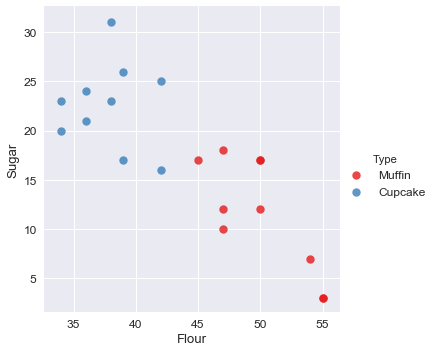

In [18]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [19]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
print("ingredients: \n" + str(ingredients))
type_label = np.where(recipes['Type']=='Muffin', -1, 1)
print("labels: \n" + str(type_label))

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

ingredients: 
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]
labels: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [20]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
score = model.fit(ingredients, type_label)

In [21]:
# Get the separating hyperplane
A,B,C = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
print("w=[A,B]: ",A,B)
print("model intercept (C): " + str(C))

a = -A / B
ymin, ymax = 0,30
xmin = -C / A
xmax = (ymax + C/B) / (-A/B)

xx = [xmin, xmax]
yy = [ymin,ymax]

print("lambdas: " + str(model.dual_coef_), + (0.19748237 +  0.0246853))
print(model.support_vectors_)

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
xx_s_neg_min = (ymin - b[1] + a * b[0]) / a
xx_s_neg_max = (ymax - b[1] + a * b[0]) / a
xx_s_neg = [xx_s_neg_min, xx_s_neg_max] 

b = model.support_vectors_[-1]
xx_s_pos_min = (ymin - b[1] + a * b[0]) / a
xx_s_pos_max = (ymax - b[1] + a * b[0]) / a
xx_s_pos = [xx_s_pos_min, xx_s_pos_max] 

w=[A,B]:  -0.666503013699 -7.77156117238e-16
model intercept (C): 28.9929629224
lambdas: [[-0.22216767  0.19748237  0.0246853 ]] 0.22216766999999998
[[ 45.  17.]
 [ 42.  16.]
 [ 42.  25.]]


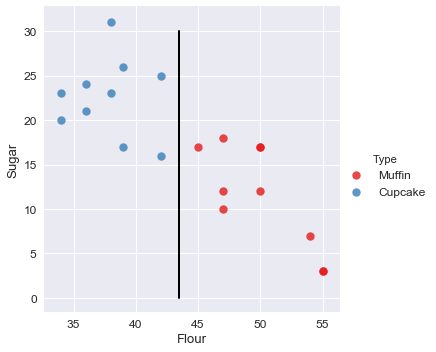

In [22]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

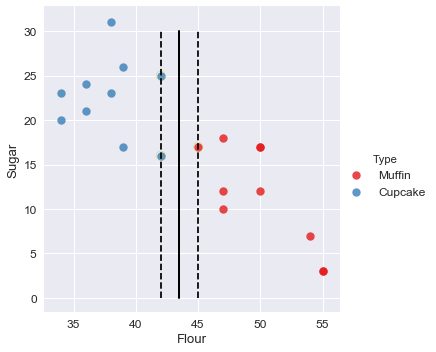

In [23]:

# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx_s_neg, yy, 'k--')
plt.plot(xx_s_pos, yy, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none', color="y");

In [24]:
from sklearn.metrics import roc_curve, auc

fpr = [] #false positive rate, ergo 1 - specificity
tpr = [] #true positive rate, ergo sensitivity
print(score.decision_function(ingredients))
fpr, tpr, _ = roc_curve(type_label, score.decision_function(ingredients))
roc_auc = auc(fpr, tpr)

[-7.66470283 -2.33267872 -2.33267872 -0.99967269 -4.33218776 -7.66470283
 -6.99819982 -2.33267872 -4.33218776 -4.33218776  2.99934539  0.99983635
  6.33186046  2.99934539  3.6658484   0.99983635  4.99885443  3.6658484
  4.99885443  6.33186046]


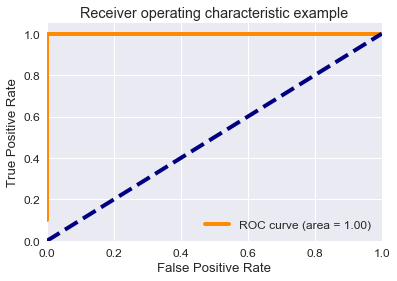

In [25]:
# plot ROC curve
plt.figure()
lw = 4 #line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==-1:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [ ]:

# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


In [ ]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');